In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
data=pd.read_csv('dataset/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
data.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [17]:
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].median())
data['BMI']=data['BMI'].replace(0,data['BMI'].mean())

In [18]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,94.652344,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,105.547598,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

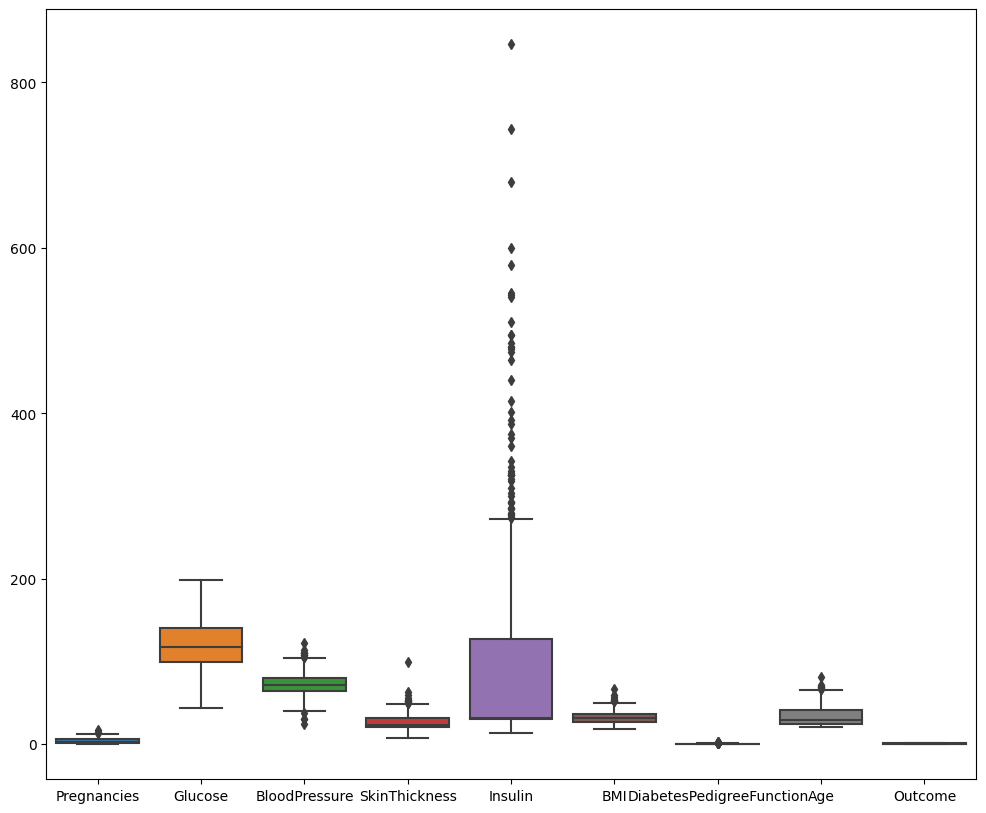

In [19]:
plt.figure(figsize=(12,10))
sns.boxplot(data)

In [20]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.25, random_state=42)
X_train.shape,X_test.shape

((576, 8), (192, 8))

In [28]:
import pickle
def standard_scaling(X_train,X_test):
    scaler=StandardScaler()
    X_train_scaled=scaler.fit_transform(X_train)
    X_test_scaled=scaler.transform(X_test)

    file=open('models/scaler.pkl','wb')
    pickle.dump(scaler,file)
    file.close()
    return X_train_scaled,X_test_scaled

In [30]:
X_train_scaled,X_test_scaled=standard_scaling(X_train,X_test)

In [32]:
X_train_scaled.shape

(576, 8)

In [33]:
parameter={
    'criterion':['gini','gini','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,4],
    'max_features':['auto','sqrt','log2']
}

In [34]:
import warnings
warnings.filterwarnings('ignore')

In [35]:
from sklearn.model_selection import GridSearchCV
classifier=DecisionTreeClassifier()

In [37]:
clf=GridSearchCV(classifier,param_grid=parameter,cv=3,scoring='accuracy',verbose=3)
clf.fit(X_train_scaled,y_train)

Fitting 3 folds for each of 90 candidates, totalling 270 fits
[CV 1/3] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=sqrt, splitter=best;, score=0.630 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=sqrt, splitter=best;, score=0.615 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=sqrt, splitter=best;, sco

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'gini', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 4],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [38]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'sqrt',
 'splitter': 'random'}

In [39]:
dc_class=DecisionTreeClassifier(criterion='gini',max_depth=4,max_features='sqrt',splitter='random')
dc_class.fit(X_train_scaled,y_train)

DecisionTreeClassifier(max_depth=4, max_features='sqrt', splitter='random')

In [41]:
y_pred=dc_class.predict(X_test_scaled)

In [42]:
accuracy_score(y_test,y_pred)

0.6875

In [44]:
para={
    'C':[0.1,1,10],
    'gamma':[1,0.1,0.01,0.001,0.001],
    'kernel':['linear','rbf','polynomial']
}

In [45]:
svc=SVC()

In [46]:
clf2=GridSearchCV(svc,param_grid=para,refit=True,cv=3,scoring='accuracy')
clf2.fit(X_train_scaled,y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.001],
                         'kernel': ['linear', 'rbf', 'polynomial']},
             scoring='accuracy')

In [47]:
clf2.best_params_

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

In [48]:
svc2=SVC(C=10,gamma=0.001,kernel='rbf')
svc2.fit(X_train_scaled,y_train)

SVC(C=10, gamma=0.001)

In [50]:
y_pred_2=svc2.predict(X_test_scaled)

In [51]:
accuracy_score(y_test,y_pred_2)

0.7395833333333334

In [52]:
confusion_matrix(y_test,y_pred_2)

array([[102,  21],
       [ 29,  40]], dtype=int64)

In [53]:
file=open('models/svc_classifier.pkl','wb')
pickle.dump(svc2,file)
file.close()

In [54]:
from sklearn.naive_bayes import GaussianNB

In [56]:
nb=GaussianNB()
nb.fit(X_train_scaled,y_train)

GaussianNB()

In [59]:
y_pred_nb=nb.predict(X_test_scaled)

In [60]:
accuracy_score(y_test,y_pred_nb)

0.7239583333333334

In [61]:
confusion_matrix(y_test,y_pred_nb)

array([[94, 29],
       [24, 45]], dtype=int64)